# Huggingface OpenAI GPT and GPT2 models

Hugginface comes with several versions of the OpenAI GPT model for generating facke test

Here, we compare the original GPT with the later GPT2. 

Both models have the exact same architecture, but arev trained with different size data sets.
The GPT2 model is trained with a much larger data set and performs significantly better:


_"GPT-2 is a direct scale-up of GPT, with more than 10X the parameters and trained on more than 10X the amount of data."_  

 https://openai.com/blog/better-language-models/


### Observations

- The distrobution of $\alpha$ exponents is smaller
- Information flow is better in GPT2
- Frobenius and Spectral Norms are Larger for GPT2 vs GPT
- Embedding / first 2 layers, and last couple layes, have unusually large spectral norms

#### Could be a normalization issue ?

- BUT I think we see rank collapse in GPT, throwing the metrics


In [ ]:
REPEAT = False # set true to rerun weightwatcher calculations from scratch
SAVE_DATA = False # DO NOT set True unless you want to replace all files in ./data

In [53]:
import numpy as np
import pandas as pd
import numpy as np
import scipy.sparse as sp
import random, datetime

from tqdm import tqdm 

import os, gc, logging
logger = logging.getLogger()

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext watermark
%watermark

Last updated: 2021-01-01T21:19:37.862949-08:00

Python implementation: CPython
Python version       : 3.7.6
IPython version      : 7.11.1

Compiler    : Clang 4.0.1 (tags/RELEASE_401/final)
OS          : Darwin
Release     : 17.7.0
Machine     : x86_64
Processor   : i386
CPU cores   : 12
Architecture: 64bit



In [2]:
!pip install transformers

In [3]:
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

import weightwatcher as ww
print("weightwatcher version {}".format(ww.__version__))


Using TensorFlow backend.


weightwatcher version 0.2.7


In [4]:
import torch
import transformers
from transformers import OpenAIGPTModel,GPT2Model
print("transformers version {}".format(transformers.__version__))

INFO:transformers.file_utils:PyTorch version 1.3.1 available.


transformers version 2.3.0


In [5]:
gpt_model = OpenAIGPTModel.from_pretrained('openai-gpt')
gpt_model.eval();

INFO:transformers.configuration_utils:loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/openai-gpt-config.json from cache at /Users/charleshmartin/.cache/torch/transformers/a27bb7c70e9002d7558d2682d5a95f3c0a8b31034616309459e0b51ef07ade09.bd0797be126548711309ad2174d2afb16e3c37e891707667603d85e35a4ad001
INFO:transformers.configuration_utils:Model config {
  "afn": "gelu",
  "architectures": [
    "OpenAIGPTLMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "embd_pdrop": 0.1,
  "finetuning_task": null,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1"
  },
  "initializer_range": 0.02,
  "is_decoder": false,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1
  },
  "layer_norm_epsilon": 1e-05,
  "model_type": "openai-gpt",
  "n_ctx": 512,
  "n_embd": 768,
  "n_head": 12,
  "n_layer": 12,
  "n_positions": 512,
  "n_special": 0,
  "num_labels": 2,
  "output_attentions": false,
  "output_hidden_states": false,
  "output_past": true,
  "predict_special_tokens": true,
  

In [6]:
gpt2_model = GPT2Model.from_pretrained('gpt2')
gpt2_model.eval();

INFO:transformers.configuration_utils:loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/gpt2-config.json from cache at /Users/charleshmartin/.cache/torch/transformers/4be02c5697d91738003fb1685c9872f284166aa32e061576bbe6aaeb95649fcf.db13c9bc9c7bdd738ec89e069621d88e05dc670366092d809a9cbcac6798e24e
INFO:transformers.configuration_utils:Model config {
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "finetuning_task": null,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1"
  },
  "initializer_range": 0.02,
  "is_decoder": false,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1
  },
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_layer": 12,
  "n_positions": 1024,
  "num_labels": 2,
  "output_attentions": false,
  "output_hidden_states": false,
  "output_past": true,

In [7]:
watcher = ww.WeightWatcher(model=gpt_model, logger=logger)
results = watcher.analyze(alphas=True, softranks=True, spectralnorms=True, plot=False)

summary =  watcher.get_summary()

details  = watcher.get_details(results=results)
details.drop(columns=['slice', 'slice_count'], inplace=True)
details.dropna(inplace=True)
details['NxM'] = pd.to_numeric(details.N * details.M) 

INFO:__main__:

python      version 3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.17.4
tensforflow version 1.15.0
keras       version 2.2.4
INFO:__main__:Analyzing model
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charle

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib

INFO:__main__:alpha pNorm compound: min: 3.0149671430659817, max: 14.118298434606714, avg: 7.416626346226539


INFO:__main__:

python      version 3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.17.4
tensforflow version 1.15.0
keras       version 2.2.4
INFO:__main__:Analyzing model
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


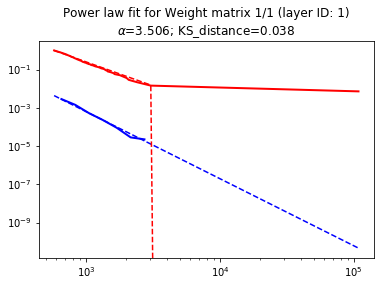

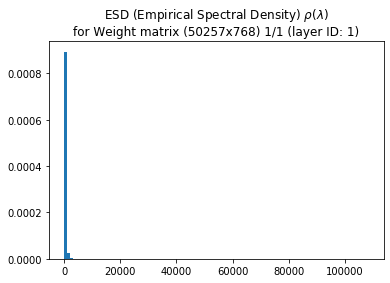

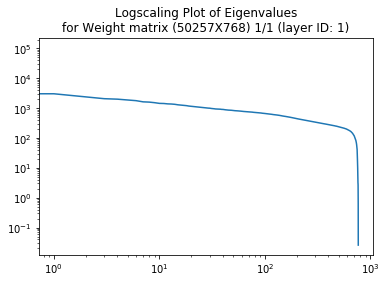

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


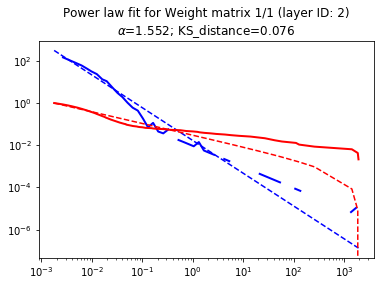

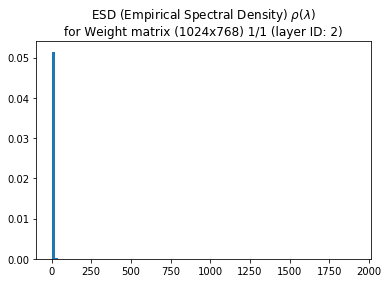

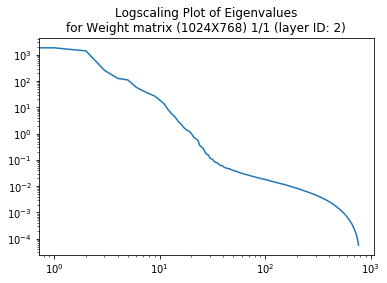

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


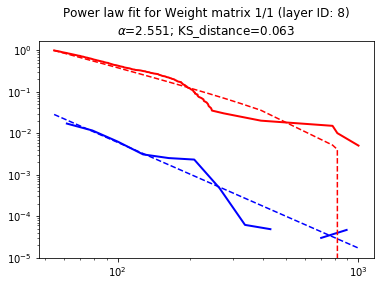

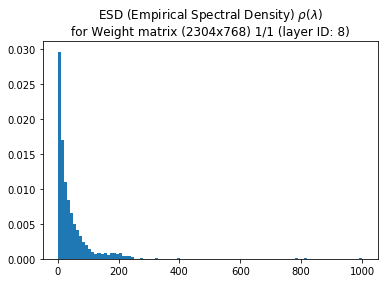

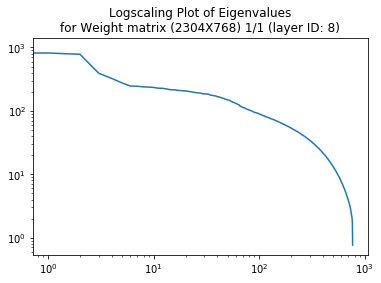

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


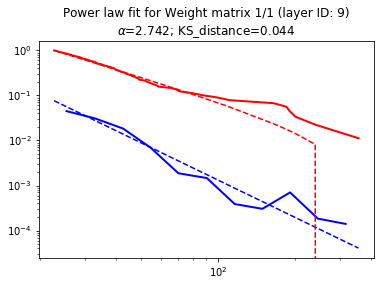

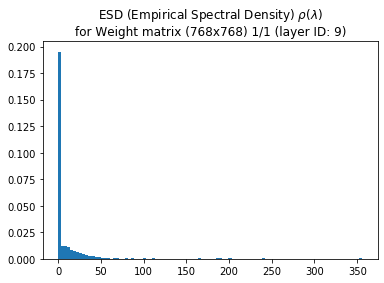

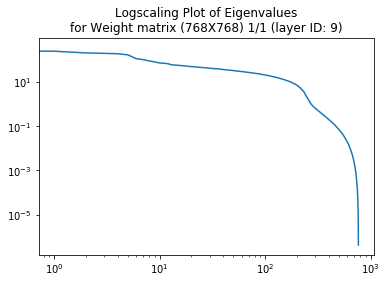

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


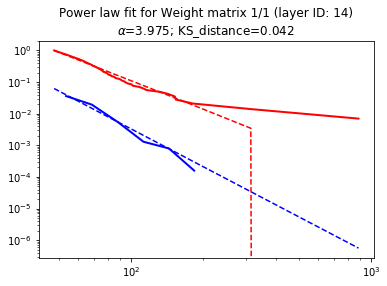

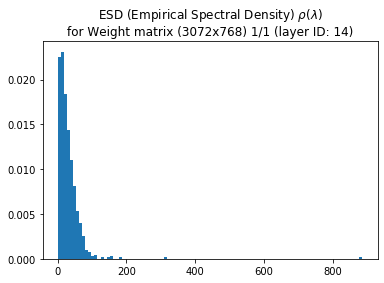

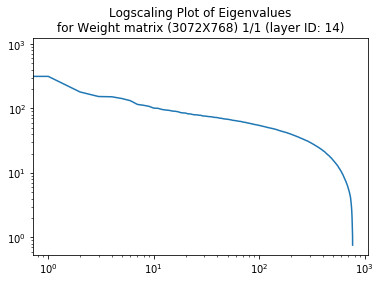

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


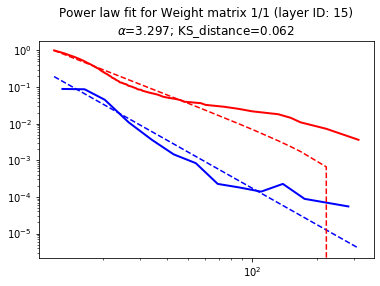

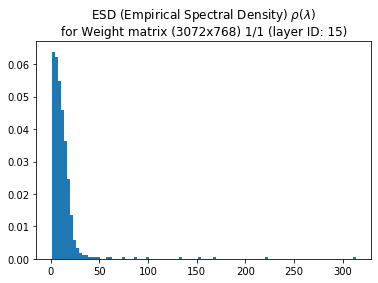

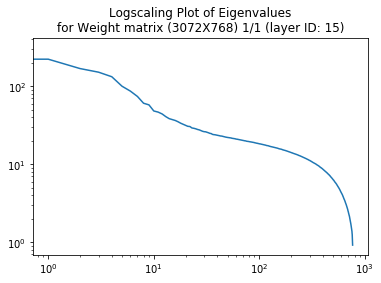

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


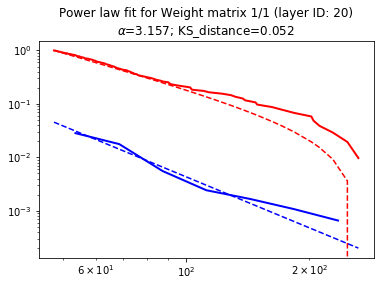

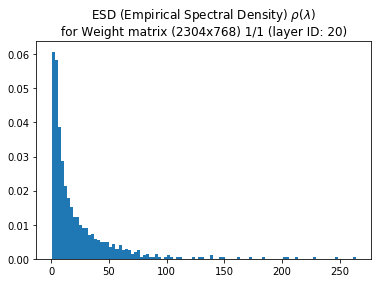

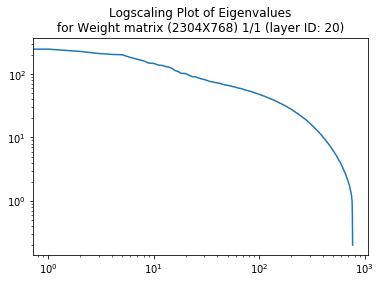

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


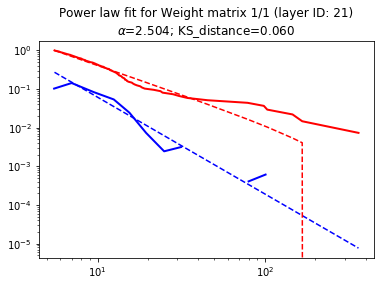

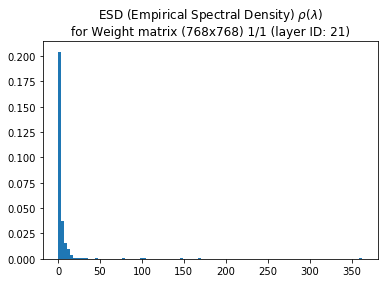

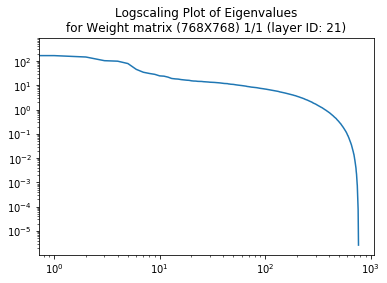

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


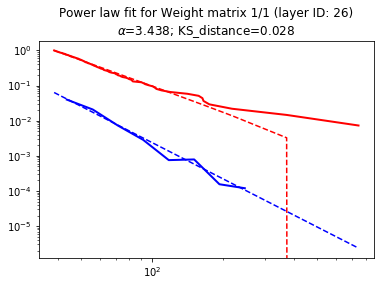

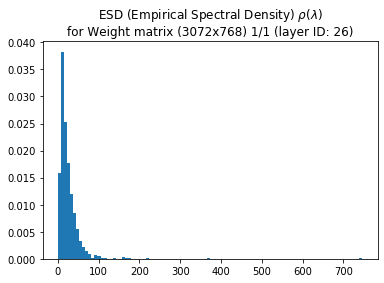

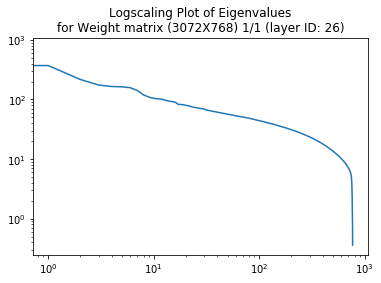

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


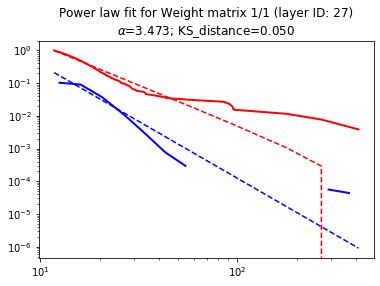

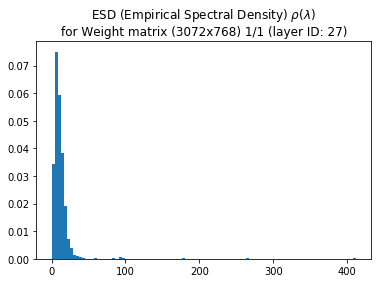

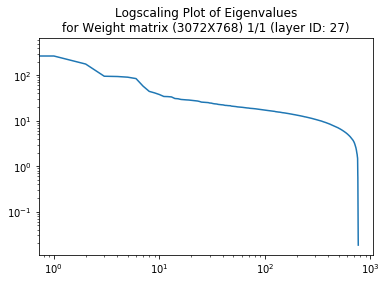

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


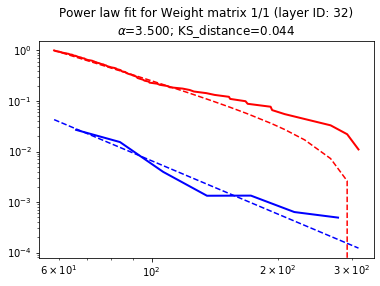

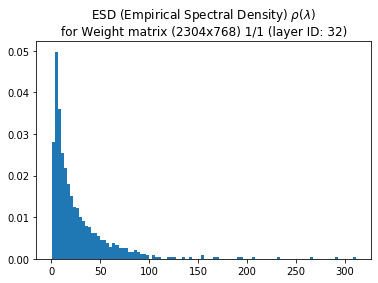

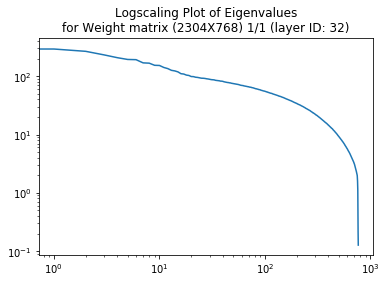

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


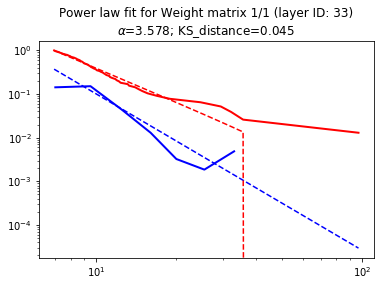

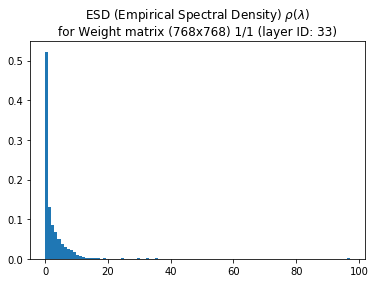

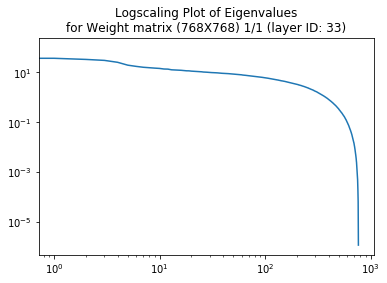

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


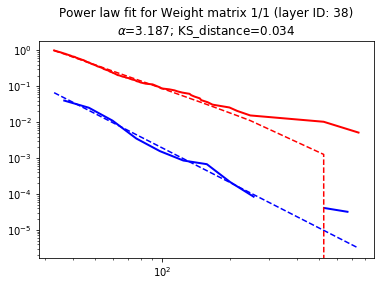

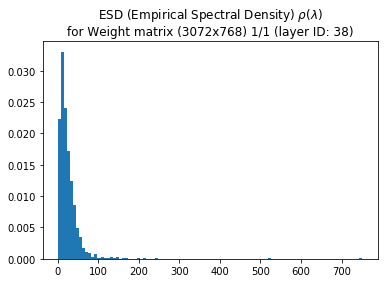

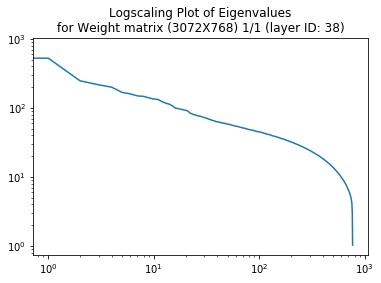

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


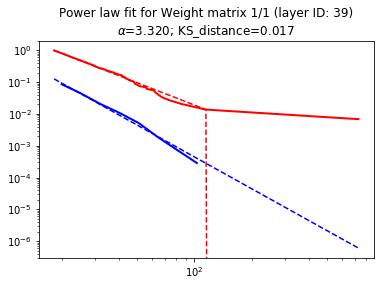

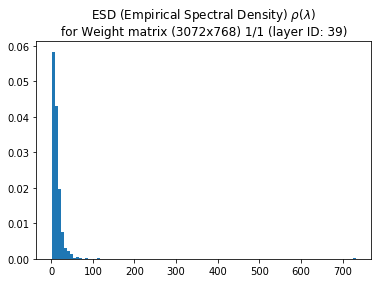

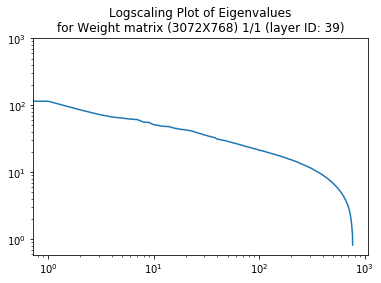

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


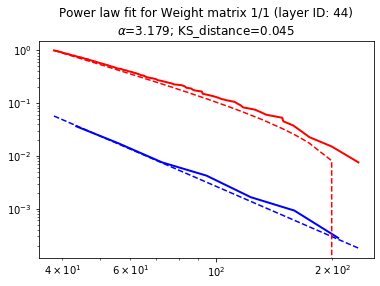

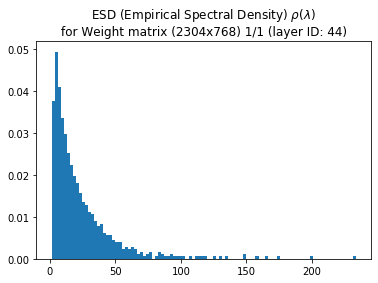

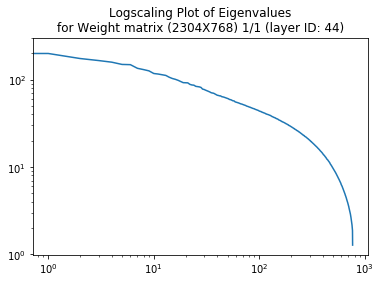

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


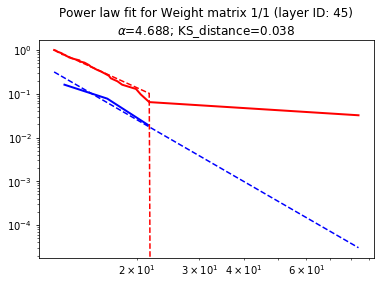

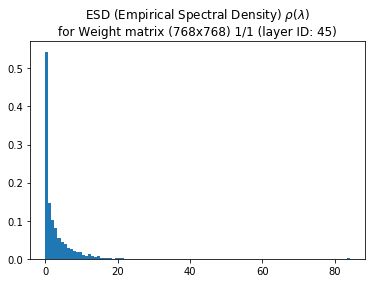

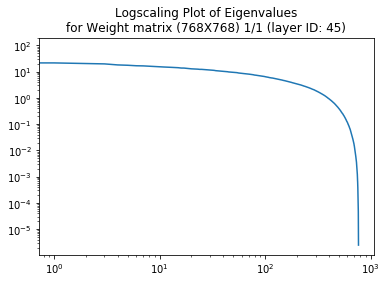

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


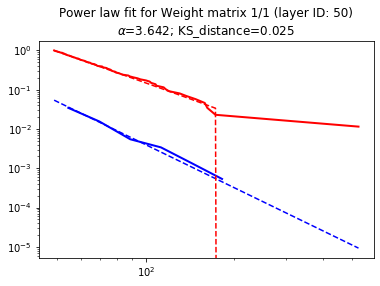

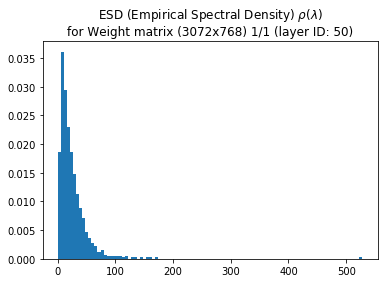

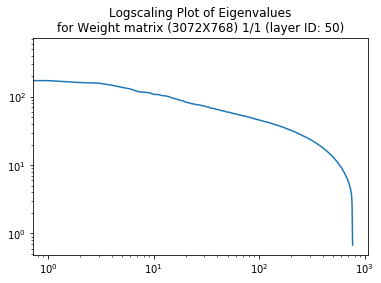

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


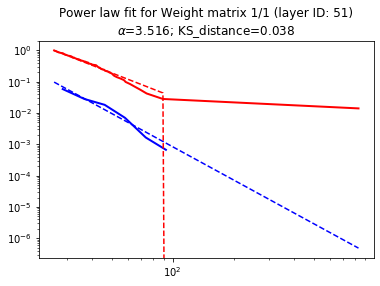

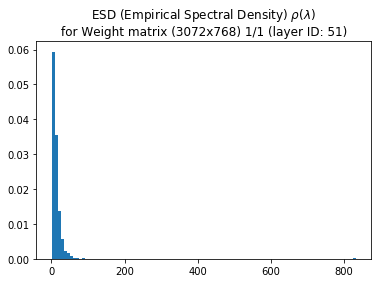

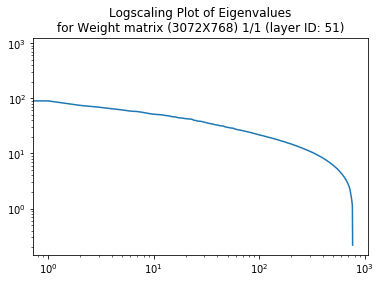

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


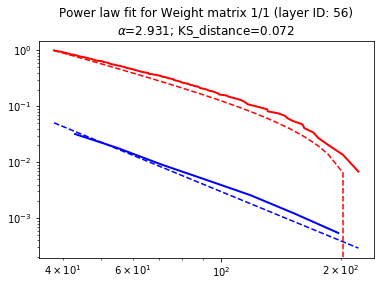

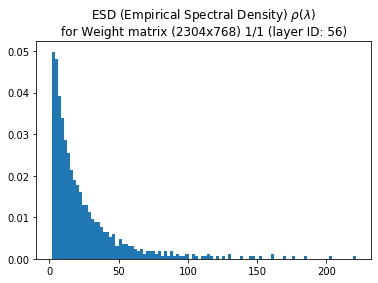

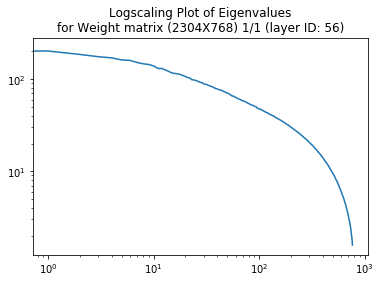

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


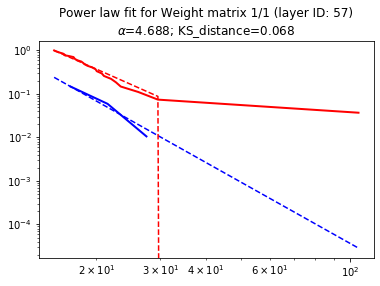

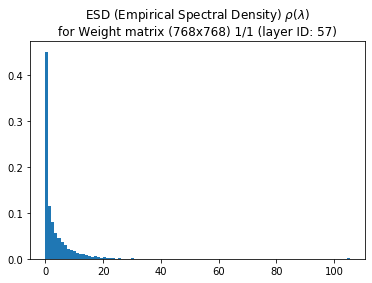

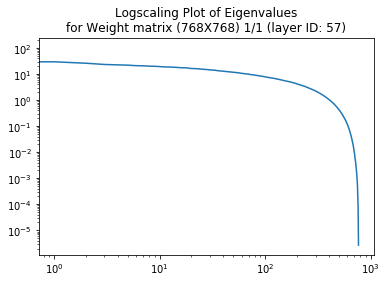

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


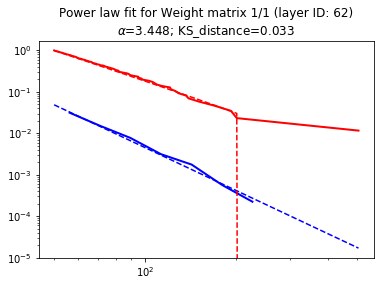

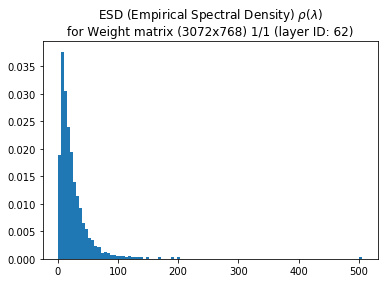

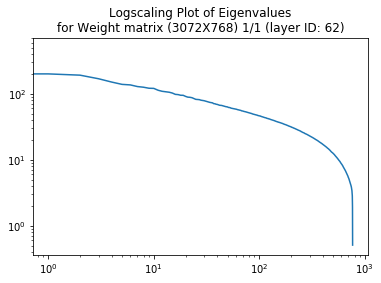

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


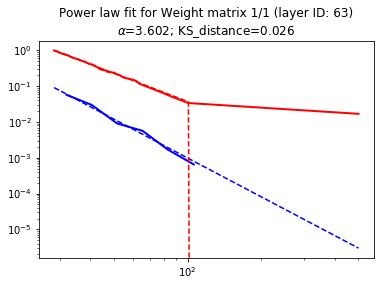

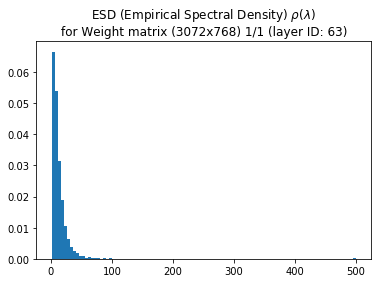

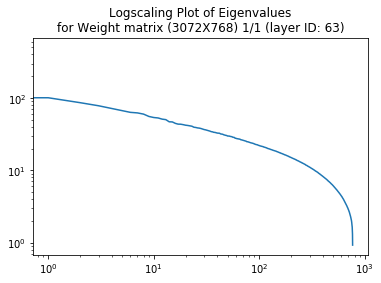

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


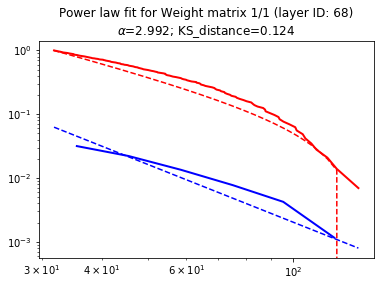

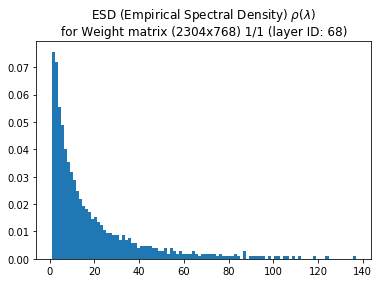

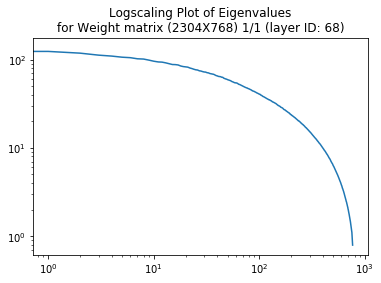

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


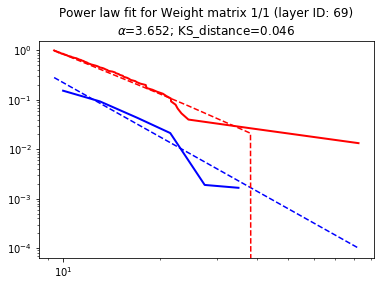

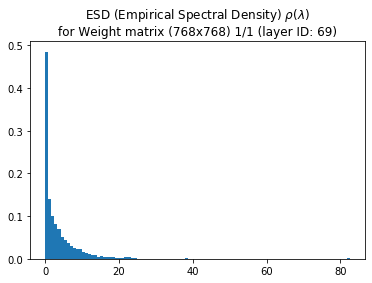

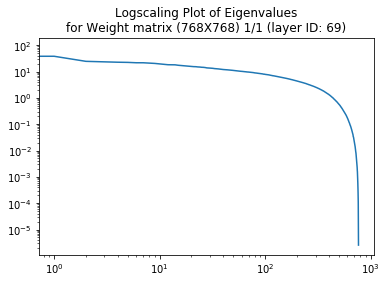

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


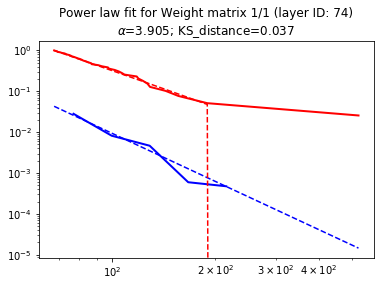

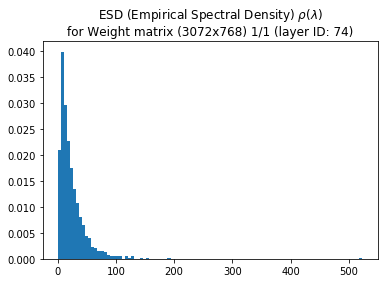

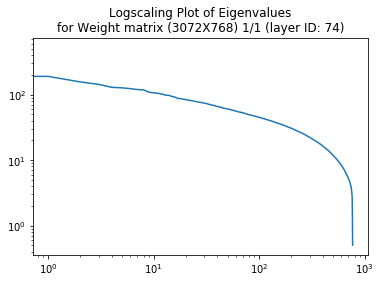

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


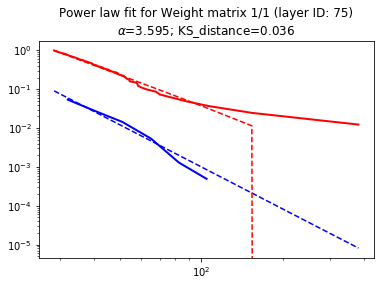

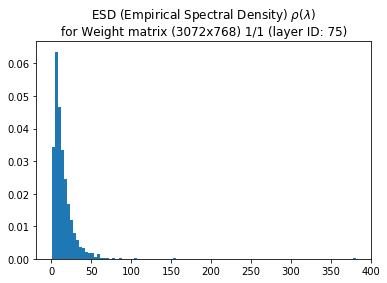

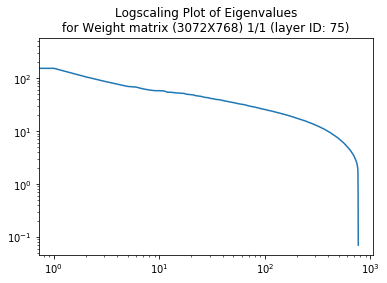

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:1178: RuntimeWarning: overflow encountered in double_scalars
  return (self.alpha-1) * self.xmin**(self.alpha-1)
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:825: RuntimeWarning: invalid value encountered in multiply
  likelihoods = f*C


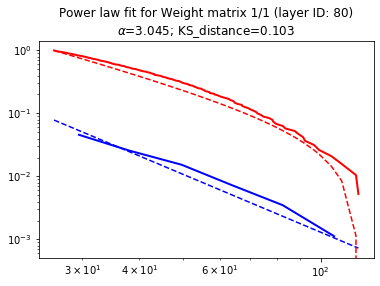

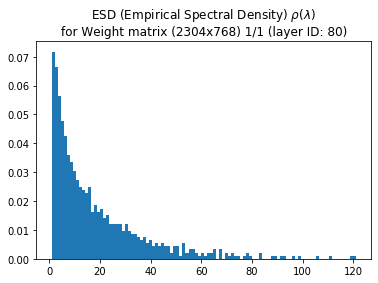

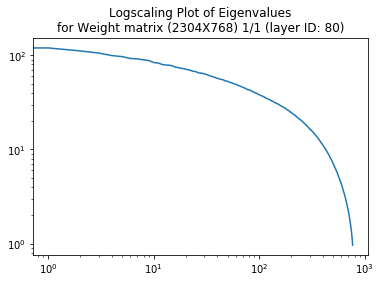

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


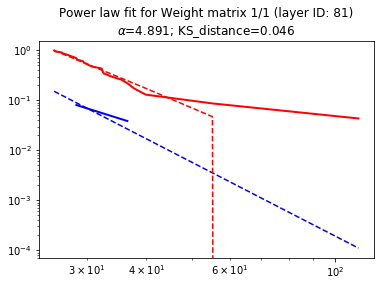

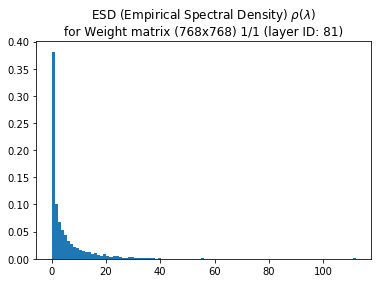

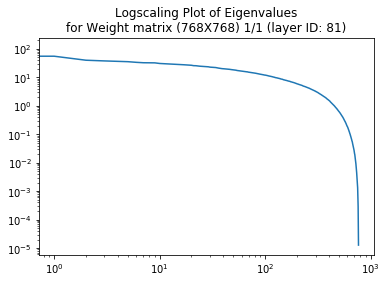

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


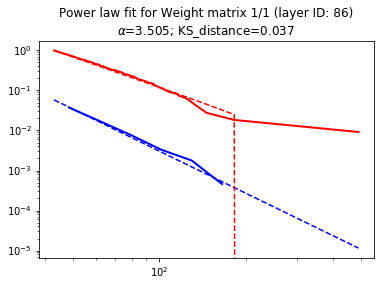

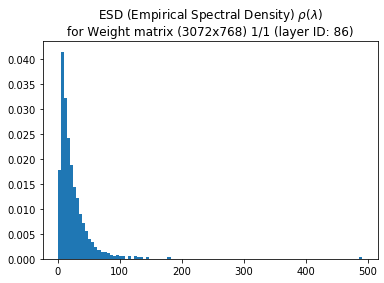

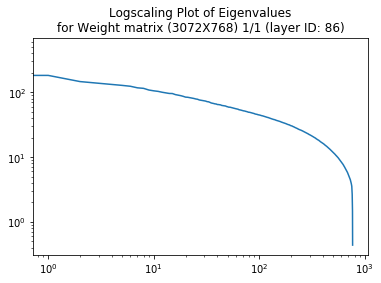

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


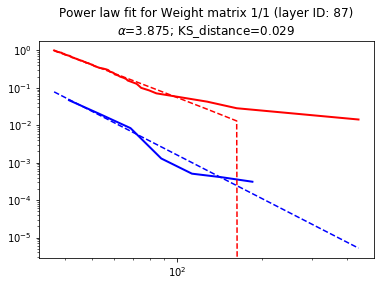

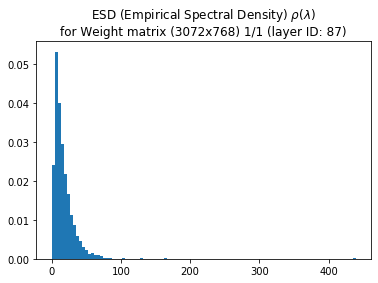

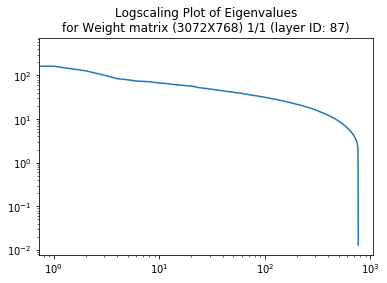

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


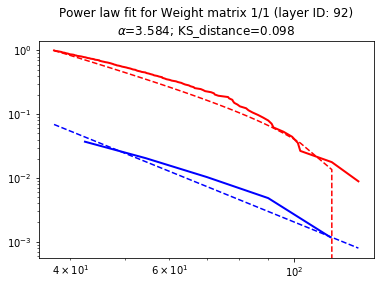

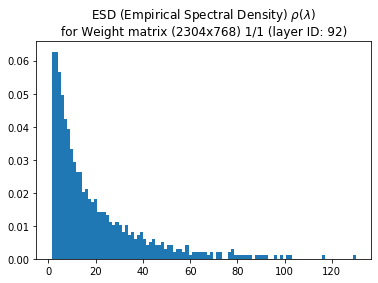

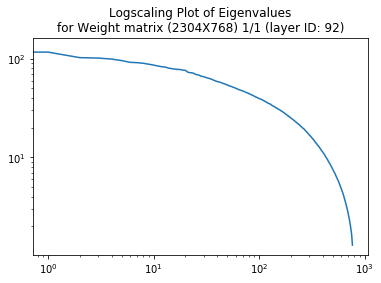

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


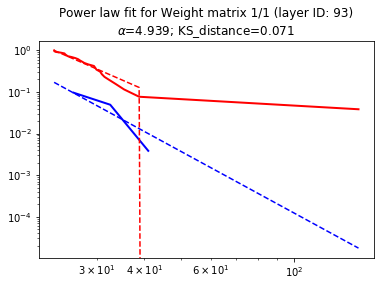

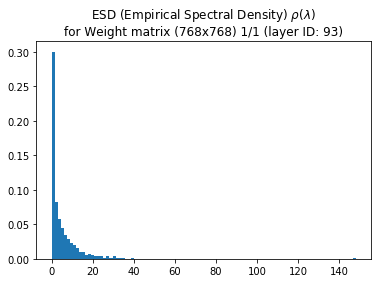

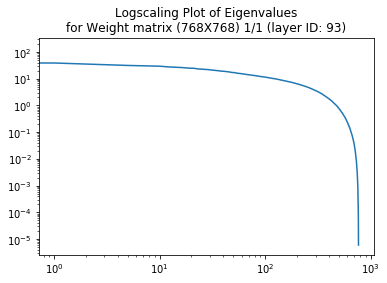

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


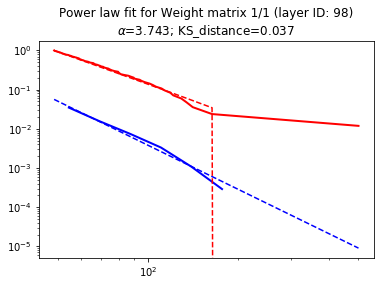

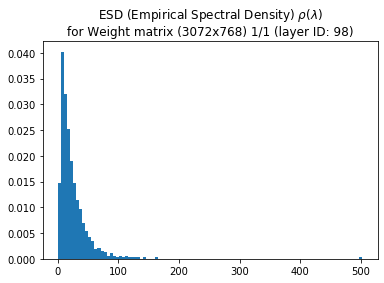

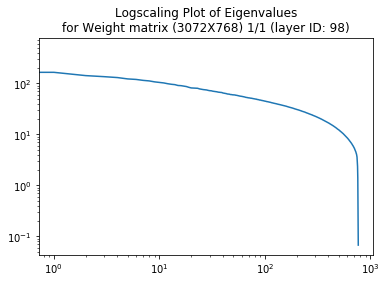

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


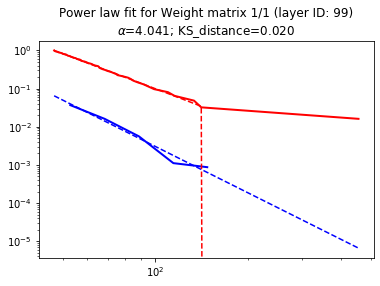

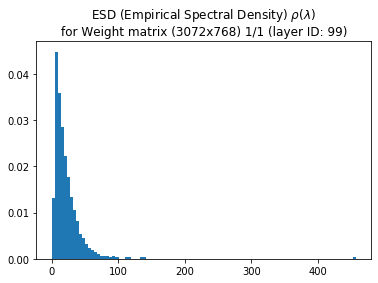

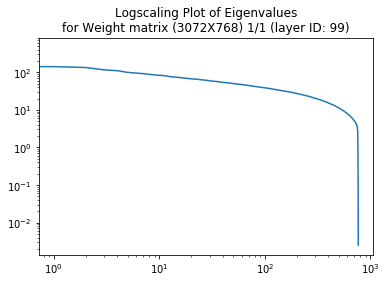

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


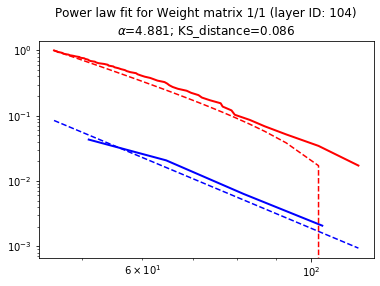

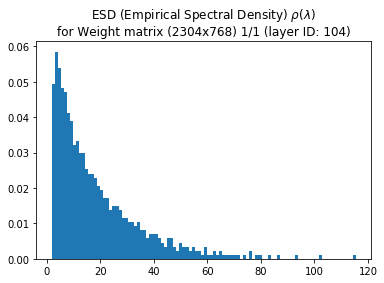

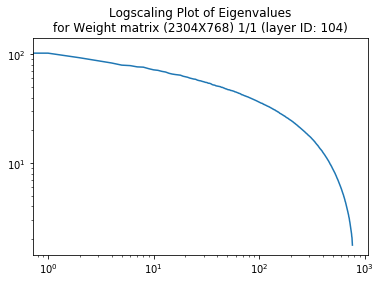

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


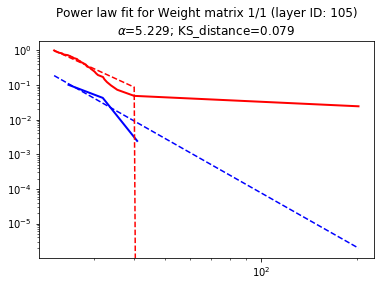

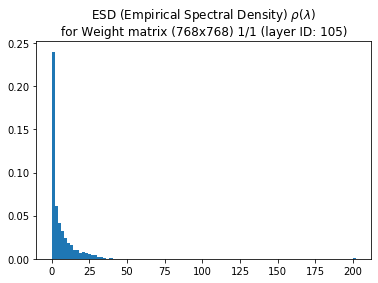

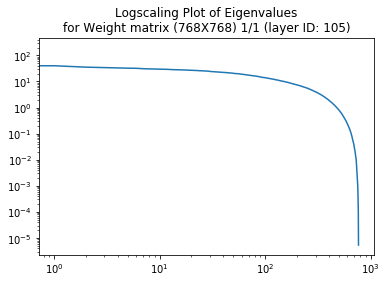

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


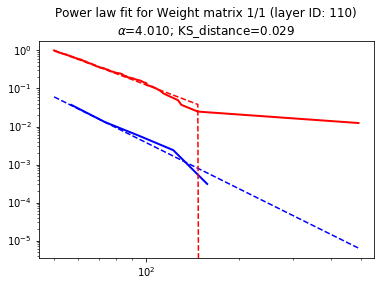

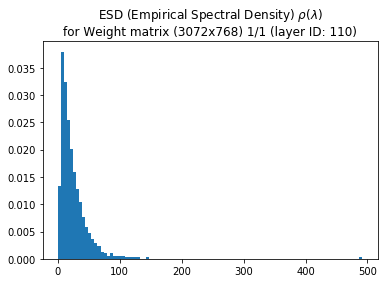

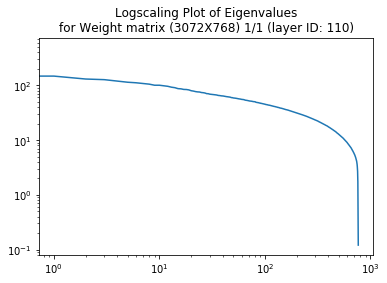

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


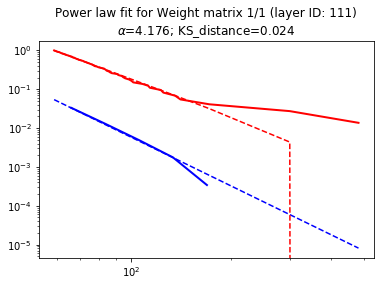

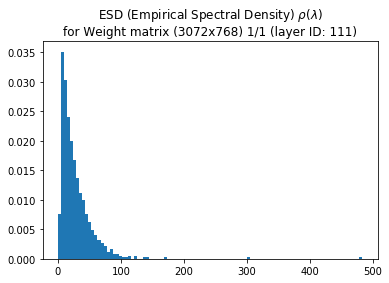

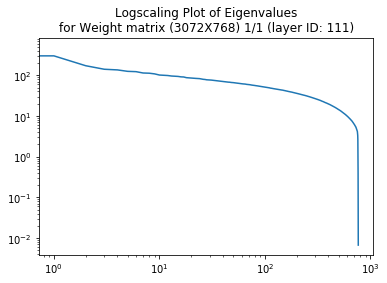

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


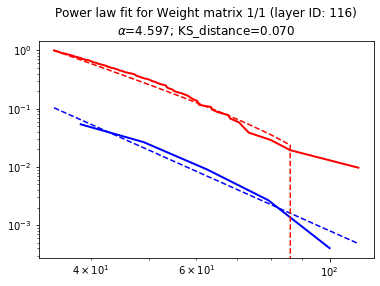

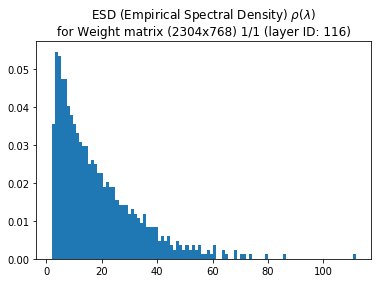

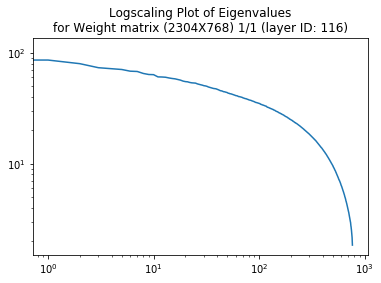

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


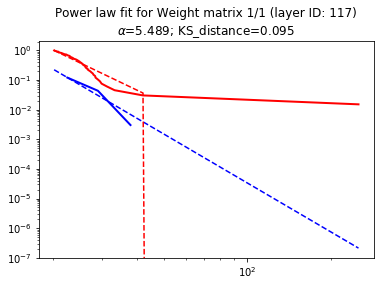

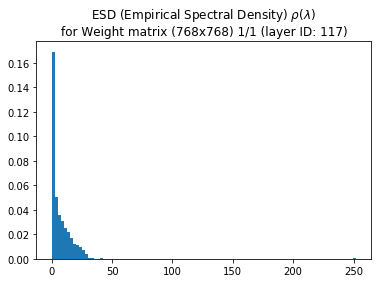

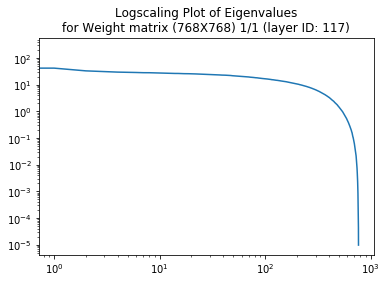

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


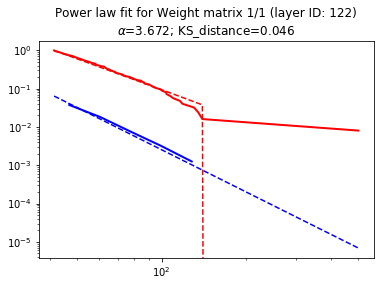

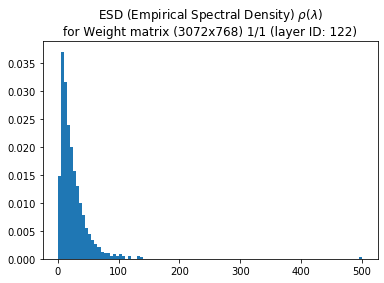

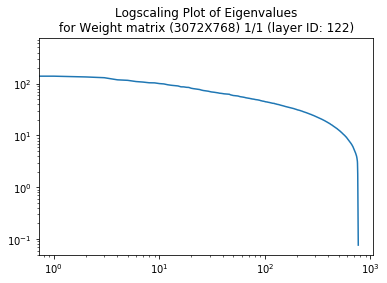

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


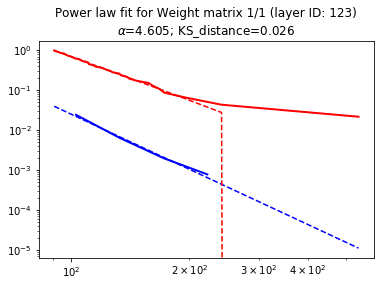

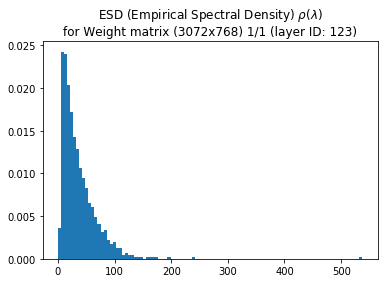

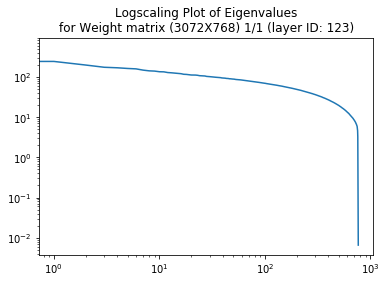

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


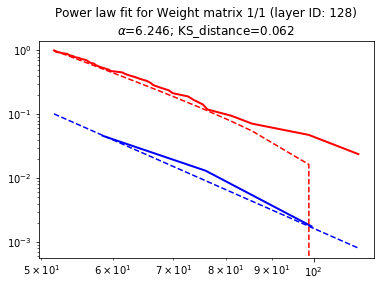

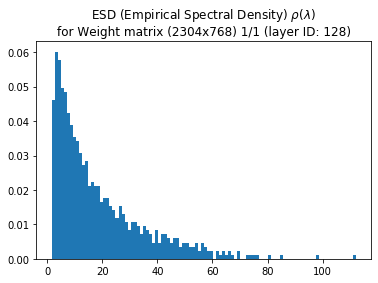

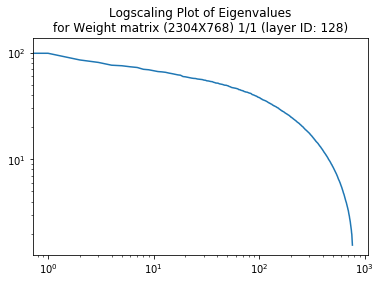

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


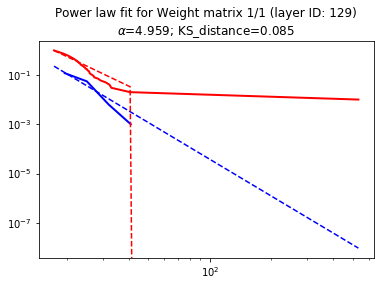

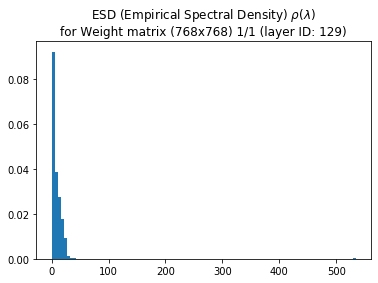

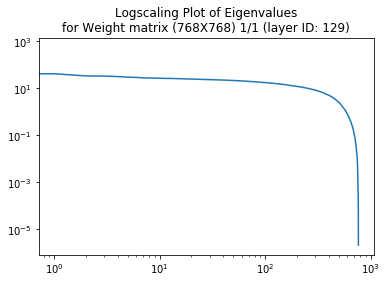

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


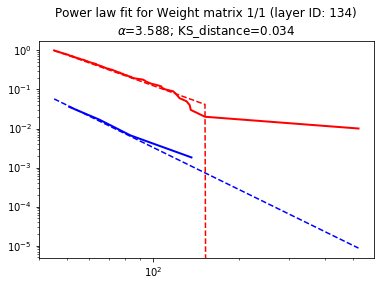

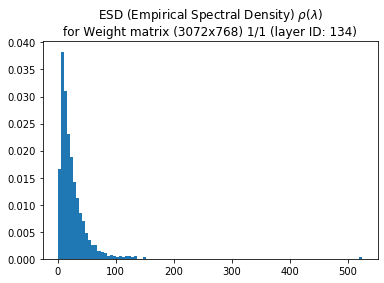

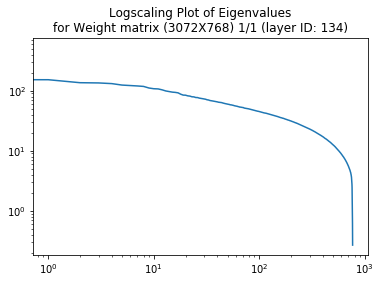

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


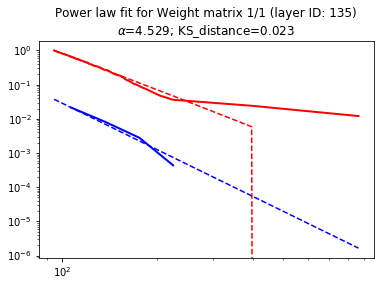

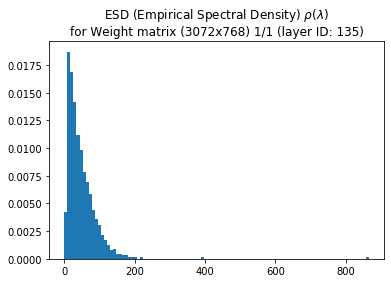

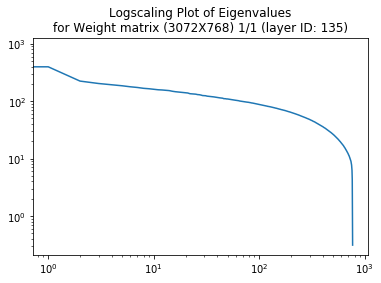

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


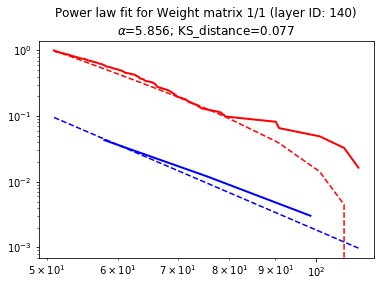

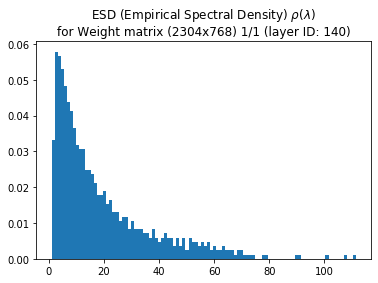

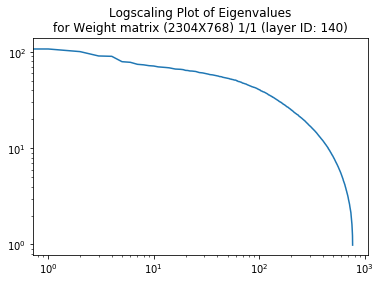

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


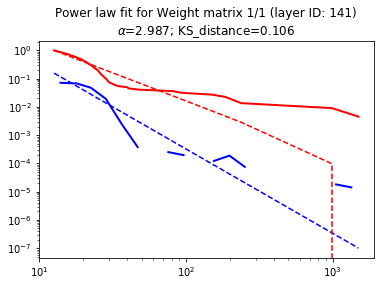

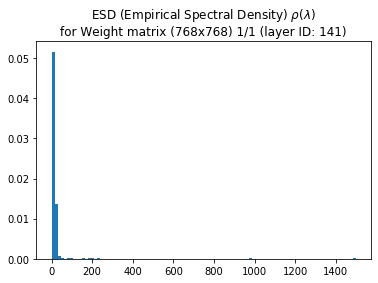

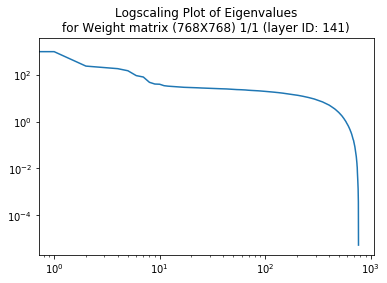

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


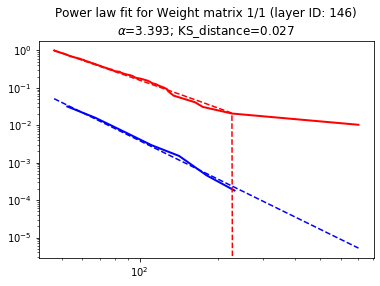

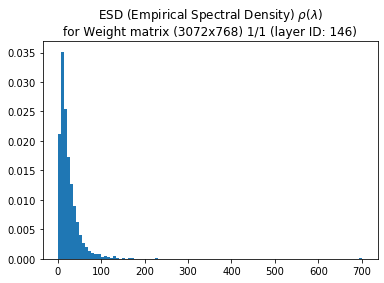

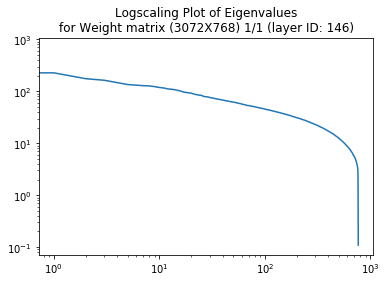

/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww-kdd/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


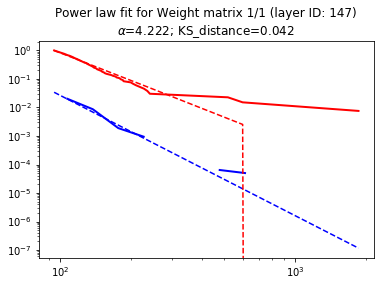

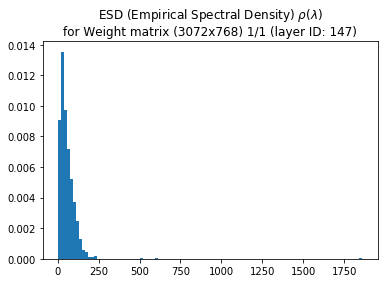

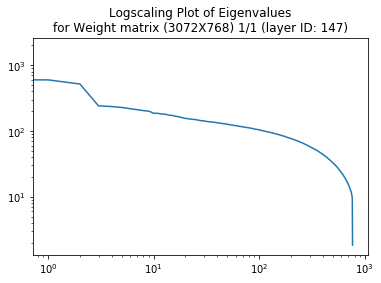

INFO:__main__:### Printing results ###
INFO:__main__:Check: min: 0.08103540539741516, max: 0.19961957484483284, avg: 0.1271023109924772
INFO:__main__:Check compound: min: 0.08103540539741516, max: 0.19961957484483284, avg: 0.1271023109924772
INFO:__main__:CheckTF: min: False, max: False, avg: 0.0
INFO:__main__:CheckTF compound: min: 0.0, max: 0.0, avg: 0.0
INFO:__main__:Norm: min: 44.006927490234375, max: 631.2603149414062, avg: 126.1707992553711
INFO:__main__:Norm compound: min: 44.006927490234375, max: 631.2603149414062, avg: 126.1707992553711
INFO:__main__:LogNorm: min: 1.6435210704803467, max: 2.800208568572998, avg: 2.0508360862731934
INFO:__main__:LogNorm compound: min: 1.6435210704803467, max: 2.800208568572998, avg: 2.0508360862731934
INFO:__main__:Norm X: min: 149.1733856201172, max: 109206.015625, avg: 3126.409912109375
INFO:__main__:Norm X compound: min: 149.1733856201172, max: 109206.015625, avg: 3126.409912109375
INFO:__main__:LogNorm X: min: 2.1736912727355957, max: 5.038

In [8]:
watcher = ww.WeightWatcher(model=gpt2_model, logger=logger)
results2 = watcher.analyze(alphas=True, softranks=True, spectralnorms=True, plot=True)

summary2 =  watcher.get_summary()

details2  = watcher.get_details(results=results2)
details2.drop(columns=['slice', 'slice_count'], inplace=True)
details2.dropna(inplace=True)
details2['NxM'] = pd.to_numeric(details2.N * details2.M) 

In [9]:
alpha = [(x) for x in details['alpha'].to_numpy()]
alpha2 = [(x) for x in details2['alpha'].to_numpy()]

In [10]:
logsnorm = [np.log10(x) for x in details['spectralnorm'].to_numpy()]
logsnorm2 = [np.log10(x) for x in details2['spectralnorm'].to_numpy()]


In [11]:
plt.rcParams.update({'font.size': 20})
from pylab import rcParams
rcParams['figure.figsize'] = 10,10

In [12]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

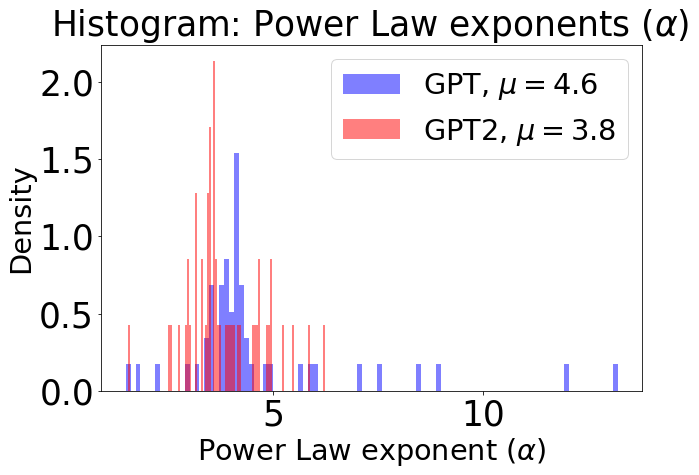

4.627440438800111 3.8335599001263265


In [38]:
plt.hist(alpha, bins=100, color='blue', alpha=0.5, density=True, label=r"GPT, $\mu=4.6$")
plt.hist(alpha2, bins=100, color='red', alpha=0.5, density=True, label=r"GPT2, $\mu=3.8$")

plt.legend()
plt.title(r"Histogram: Power Law exponents $(\alpha)$ ")#for layers of"+"\nOpenAI GPT and GPT2 Pretrained Models")
plt.xlabel(r"Power Law exponent $(\alpha)$")
plt.ylabel("Density")
plt.tight_layout()

plt.savefig("img/GPT-alpha-hist.png")
plt.show()
print(np.mean(alpha), np.mean(alpha2))

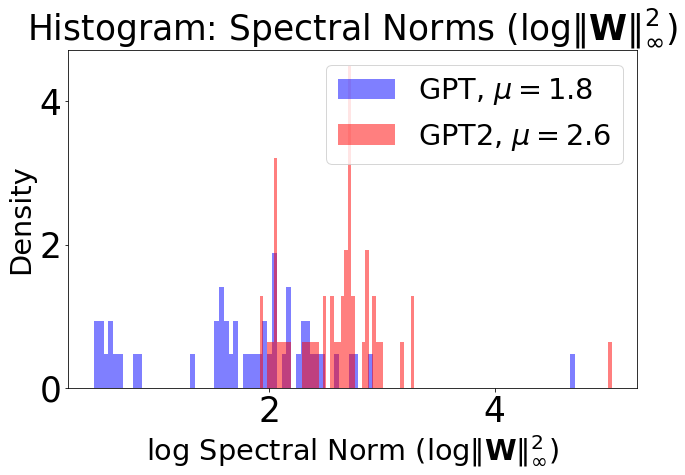

1.7785992797080565 2.5913868705787473


In [41]:
plt.hist(logsnorm, bins=100, color='blue', alpha=0.5, density=True, label="GPT, $\mu=1.8$")
plt.hist(logsnorm2, bins=100, color='red', alpha=0.5, density=True, label="GPT2, $\mu=2.6$")

plt.legend()
plt.title(r"Histogram: Spectral Norms $(\log\Vert\mathbf{W}\Vert^{2}_{\infty})$" )
          #for layers of"+"\nOpenAI GPT and GPT2 Pretrained Models")
plt.xlabel(r"log Spectral Norm $(\log\Vert\mathbf{W}\Vert^{2}_{\infty})$")
plt.ylabel("Density")
plt.tight_layout()

plt.savefig("img/GPT-snorm-hist.png")
plt.show()
print(np.mean(logsnorm), np.mean(logsnorm2))

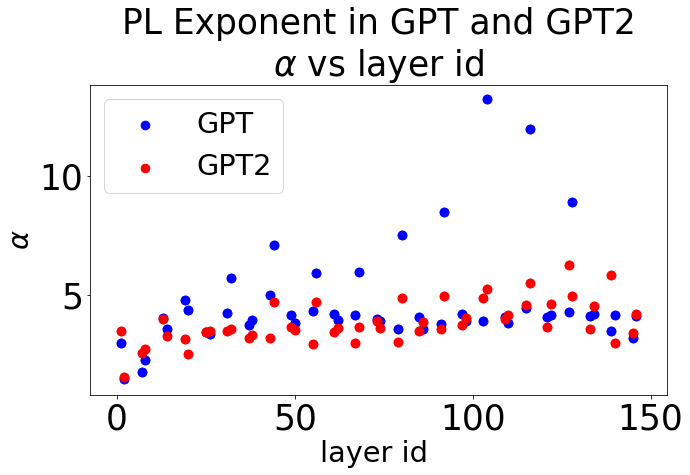

In [46]:
x = np.array(details.index)
y = details.alpha.to_numpy(dtype=np.float)
plt.scatter(x,y, label='GPT', s=75, color='b')

y2 = details2.alpha.to_numpy(dtype=np.float)
plt.scatter(x,y2, label='GPT2', s=75, color='r')

plt.xlabel("layer id ")
plt.ylabel(r"$\alpha$")
plt.legend()
plt.title(r"PL Exponent in GPT and GPT2"+ "\n"+r"$\alpha$ vs layer id")

plt.tight_layout()
plt.savefig("img/GPT-alpha-depth.png")

In [47]:
details.alpha[0:10]

layer_id
1     2.99837
1     2.99837
2      1.4903
2      1.4903
7     1.77493
7     1.77493
8     2.28394
8     2.28394
13    4.01376
13    4.01376
Name: alpha, dtype: object

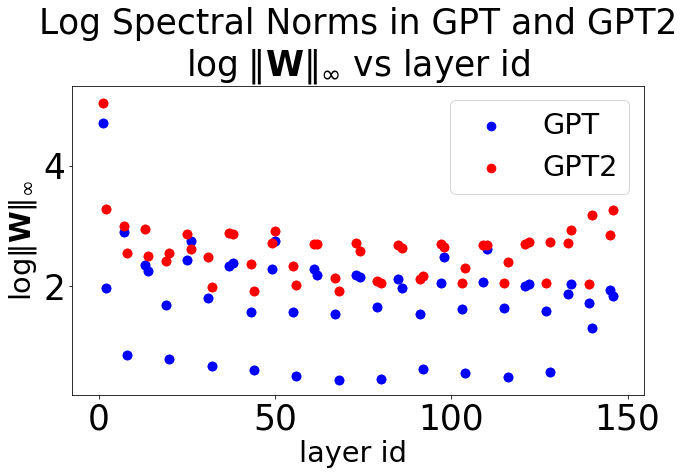

In [48]:
x = np.array(details.index)
y = np.log10(details.spectralnorm.to_numpy(dtype=np.float))
plt.scatter(x,y, label='GPT', s=75, color='b')

y2 = np.log10(details2.spectralnorm.to_numpy(dtype=np.float))
plt.scatter(x,y2, label='GPT2', s=75, color='r')

plt.xlabel("layer id ")
plt.ylabel(r"$\log\Vert\mathbf{W}\Vert_{\infty}$")
plt.legend()
plt.title("Log Spectral Norms in GPT and GPT2\n"+r"$\log\;\Vert\mathbf{W}\Vert_{\infty}$ vs layer id")
plt.tight_layout()

plt.savefig("img/GPT-snorm-depth.png")

In [49]:
details2.head(2)

,layer_type,N,M,level,comment,check,checkTF,norm,lognorm,normX,lognormX,alpha,alpha_weighted,spectralnorm,logspectralnorm,softrank,softranklog,softranklogratio,logpnorm,NxM
layer_id,,,,,,,,,,,,,,,,,,,,
1,CONV1D,50257,768,LEVEL.SLICE,Slice level,0.143696,False,631.26,2.80021,109206,5.03825,3.50582,17.6515,108375,5.03493,3.67695,0.565488,1.11231,17.6515,38597376
1,CONV1D,50257,768,LEVEL.LAYER,Layer level,0.143696,0,631.26,2.80021,109206,5.03825,3.50582,17.6515,108375,5.03493,3.67695,0.565488,1.11231,17.6515,38597376


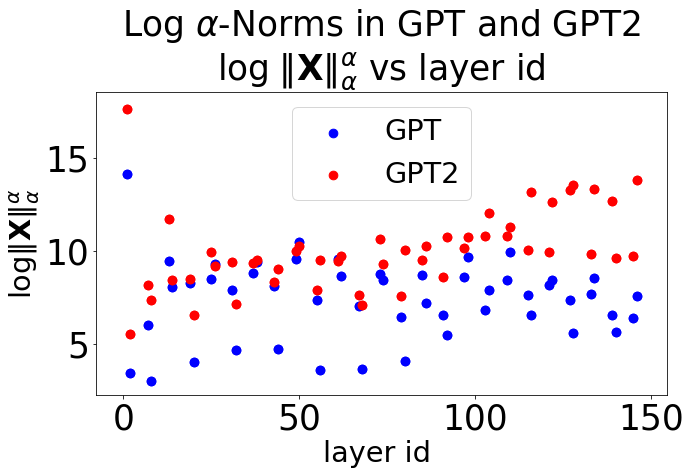

In [50]:
x = np.array(details.index)
y = details.logpnorm.to_numpy(dtype=np.float)
plt.scatter(x,y, label='GPT', s=75, color='b')

y2 = details2.logpnorm.to_numpy(dtype=np.float)
plt.scatter(x,y2, label='GPT2', s=75, color='r')

plt.xlabel("layer id ")
plt.ylabel(r"$\log\Vert\mathbf{X}\Vert_{\alpha}^{\alpha}$")
plt.legend()
plt.title(r"Log $\alpha$-Norms in GPT and GPT2"+"\n"+r"$\log\;\Vert\mathbf{X}\Vert_{\alpha}^{\alpha}$ vs layer id")
plt.tight_layout()

plt.savefig("img/GPT-pnorm-depth.png")

In [51]:
s = summary
" & {:.2f} & {:.2f} & {:.2f} & {:.2f} \\".format(s['lognorm'], s['spectralnorm'], s['alpha_weighted'], s['logpnorm'] )



' & 1.66 & 1147.77 & 7.15 & 7.42 \\'

In [52]:
def avglogmetric(d, col):
    norm = d[col].to_numpy(dtype=np.float)
    lognorm=np.log10(norm)
    avglognorm = np.average(lognorm)
    return avglognorm

def avgmetric(d, col):
    norm = d[col].to_numpy(dtype=np.float)
    avgnorm = np.average(norm)
    return avgnorm

for s, d in zip([summary, summary2],[details, details2]):
    
    d = d[d.level==ww.LEVEL.SLICE]
    d = d.loc[2:]

    avglognorm = avglogmetric(d, 'norm')
    avglogsnorm = avglogmetric(d, 'spectralnorm')
    avgwalpha = avgmetric(d, 'alpha_weighted')
    avglogpnorm = avgmetric(d, 'logpnorm')
    
    line = " & {} & {:.2f} &{:.2f}& {:.2f} & {:.2f} \\\\"
    print(line.format(len(d),avglognorm,avglogsnorm,avgwalpha,avglogpnorm))

 & 49 & 1.64 &1.72& 7.01 & 7.28 \\
 & 49 & 2.04 &2.54& 9.62 & 9.87 \\
